$~$

# IT Academy - Data Science Itinerary



$~$

## S07 T01: Hypothesis Testing
___


In [1]:
# importing libraries
import pandas as pd
import kaggle
import scipy
from scipy import stats
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from sklearn import preprocessing
import pylab
from scipy.stats import norm
import statsmodels.api as sm


 ___
 
 $~$

 first, let's search for a dataset:
 
  $~$
 

In [2]:
!kaggle datasets list -s "Olympic"


ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/heesoo37/120-years-of-olympic-history-athletes-and-results    120 years of Olympic history: athletes and results    5MB  2018-06-15 06:10:41          96622       1701  0.8235294        
datasets/stefanzivanov/olympic-games-2021-medals                       Olympic Games 2021 Medals                             3KB  2021-10-16 20:07:59           2100         44  1.0              
datasets/mysarahmadbhat/120-years-of-olympic-history                   120 Years of Olympic History                          5MB  2021-08-09 02:26:36           2036         57  1.0              
datasets/jayrav13/olympic

 $~$

 for this exercice we are going to use this [dataset](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)
  
 $~$

 let's use the following code to download the dataset from kagggle:
    
 $~$

In [4]:
PATH = "./data"

if not os.path.exists(PATH):
    os.makedirs(PATH)
if not os.listdir(PATH):
    !kaggle datasets download -d "heesoo37/120-years-of-olympic-history-athletes-and-results" --unzip -p $PATH


100%|██████████████████████████████████████| 5.43M/5.43M [00:04<00:00, 1.44MB/s]
100%|██████████████████████████████████████| 5.43M/5.43M [00:04<00:00, 1.33MB/s]


In [5]:
files = [os.path.join(PATH, f) for f in os.listdir(PATH)]

for f in files:
    print(f)


./data/noc_regions.csv
./data/athlete_events.csv


In [6]:
df = pd.read_csv(files[1])


In [7]:
display(df.head())


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
#preaparing a sample from the dataset

df_sample = df.sample(frac=1/5, random_state=2021)

df_sample.shape

(54223, 15)

$~$
___
####  Exercise 1

$~$

Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

$~$
___

$~$

For this exercise we are going to consider the following situation: 

$~$

First of all, we are going to check if the atribute to use complies with the assumption of normality. As we are going to work with the weight attribute: 

+ let's make some plots of the weight atribute (for both the population and the sample) to see if satisfy with the condition of normality.

+ let's check whether the condition of normality is satisfied using some test

+ *we will do the same with the sample that we have prepared before.*



Once the verification is done, we'll choose what statistical test to use in order to do the following:

$~$


 + test the difference between the population and the sample weight




$~$

*We want to see whether the mean weight of the athelets in this sample is significantly different from population mean*


$~$

$~$

+ Plotting the data:

$~$

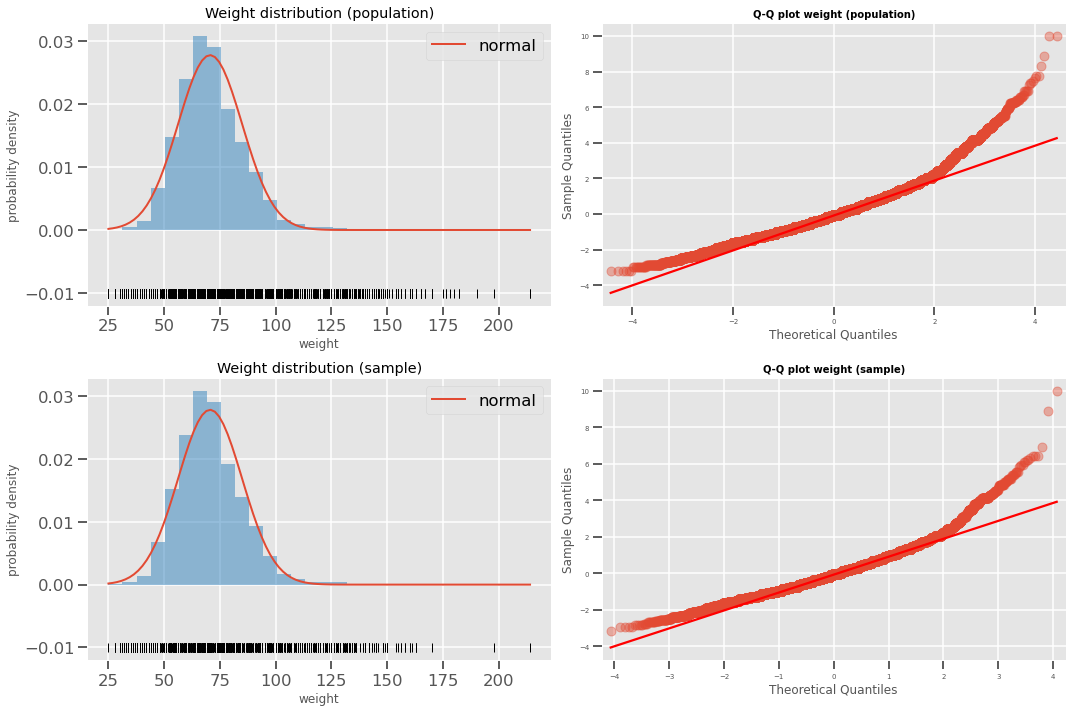

In [10]:
sns.set_context("talk")
plt.style.use('ggplot')

#POP
weight = df[df["Weight"].notnull()]["Weight"]


# values of mean (mu) and standar desviation (sigma) of the population
mu, sigma = stats.norm.fit(weight)

#  Theoretical values of the normal in the observed range
x_hat = np.linspace(min(weight), max(weight), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)


#SAMPLE

weight_sample = df_sample[df_sample["Weight"].notnull()]["Weight"]

# values of mean (mu) and standar desviation (sigma) of the population
mu_sample, sigma_sample = stats.norm.fit(weight_sample)
#  Theoretical values of the normal in the observed range
x_hat = np.linspace(min(weight_sample), max(weight_sample), num=100)
y_hat = stats.norm.pdf(x_hat, mu_sample, sigma_sample)




# plots 

fig,axes = plt.subplots(2,2,figsize=(15,10))

axes[0,0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[0,0].hist(x=weight, density=True, bins=30, color="#3182bd", alpha=0.5)
axes[0,0].plot(weight, np.full_like(weight, -0.01), '|k', markeredgewidth=1)
axes[0,0].set_title('Weight distribution (population)')
axes[0,0].set_xlabel('weight')
axes[0,0].set_ylabel('probability density')
axes[0,0].legend()

axes[1,0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[1,0].hist(x=weight_sample, density=True, bins=30, color="#3182bd", alpha=0.5)
axes[1,0].plot(weight_sample, np.full_like(weight_sample, -0.01), '|k', markeredgewidth=1)
axes[1,0].set_title('Weight distribution (sample)')
axes[1,0].set_xlabel('weight')
axes[1,0].set_ylabel('probability density')
axes[1,0].legend()

sm.qqplot(weight,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axes[0,1]

)
axes[0,1].set_title('Q-Q plot weight (population)', fontsize = 10,
           fontweight = "bold")
axes[0,1].tick_params(labelsize = 7)


sm.qqplot(weight_sample,
    fit   = True,
    line  = 'q',
    
    alpha = 0.4,
    lw    = 2,
    ax    = axes[1,1]

)
axes[1,1].set_title('Q-Q plot weight (sample)', fontsize = 10,
         fontweight = "bold")
axes[1,1].tick_params(labelsize = 7)


plt.tight_layout()
plt.show()

$~$

In the plots of distribution seems that the weight (for the population and the sample) have a normal distribution. However, the Q-Q plot shows the opposite. in order to confirm the normality of the data let's use the [D'Agostino's K-squared](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) test to determine if our atribute weight have a normal distribution

$~$

*we use this test and not the Shapiro-Wilk test because the amount of data is greater than 5000. With N >5000, p-value may not be accurate*

$~$


In [11]:
#our N >5000

print(len(weight))
print(len(weight_sample))

208241
41746


In [12]:
# D'Agostino's K-squared test Normality Test 

stat, p = stats.normaltest(weight)
alpha= 0.05
print('stat=%.3f, p=%.3f' % (stat, p))


if p < alpha:  # null hypothesis: weight comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")




stat=27009.310, p=0.000
The null hypothesis can be rejected


In [13]:
# D'Agostino's K-squared  Normality Test 

stat, p = stats.normaltest(weight_sample)
alpha= 0.05

print('stat=%.3f, p=%.3f' % (stat, p))


if p < alpha:  # null hypothesis: weight_sample comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")


stat=5794.522, p=0.000
The null hypothesis can be rejected


$~$

Although the previous test confirms that the data does not have a normal distribution, we can also try with the Jarque-Bera test.

$~$

*This tests whether the sample has the skewness and kurtosis matching with a normal distribution, i.e., skewness=0 and kurtosis =3*

In [14]:
# Jarque vera Normality Test 
stat, p = stats.jarque_bera(weight)
alpha= 0.05

print('stat=%.3f, p=%.3f' % (stat, p))

if p < alpha:  # null hypothesis: weight comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

stat=57370.084, p=0.000
The null hypothesis can be rejected


In [15]:
# Jarque vera Normality Test 
stat, p = stats.jarque_bera(weight_sample)
alpha= 0.05

print('stat=%.3f, p=%.3f' % (stat, p))

if p < alpha:  # null hypothesis: weight_sample comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

stat=13334.426, p=0.000
The null hypothesis can be rejected


$~$

we can confirm that weight (both for the population and for the sample) does not have a normal distribution. For this reason, we will have to use non-parametric tests.

$~$

Now let's see if the difference between the sample and that of the population weight are statistically significant

$~$


In [16]:
# weight population

print(df.Weight.describe())


count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64


In [17]:
# weight  sample

print(weight_sample.describe())

count    41746.000000
mean        70.587465
std         14.342593
min         25.000000
25%         60.000000
50%         70.000000
75%         79.000000
max        214.000000
Name: Weight, dtype: float64


$~$

we see that there is a difference (70.70 - 70.58) betwen the population and the sample weight

$~$

Having calculate the test it will allow us to verify the following:

+ $H_0$ : $\mu_A$ $=$ $\mu_B$
+ $H_1$ : $\mu_A$ $\neq$ $\mu_B$
+ where:  $\mu_A$ $=$ weight_sample and  $\mu_B$ = population  weight 


$~$


In [18]:
# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(weight_sample, weight)
print(wilc)


RanksumsResult(statistic=-1.458469541390247, pvalue=0.14471116470087755)


In [19]:
# Test significance
alpha = 0.05
if (wilc [1] < alpha):
    print("value of Sample  differs from given value")
else:
    print("No significant difference found")


No significant difference found


$~$

Conclusion: We cannot reject null hypothesis with the significance level of 5%. With a p-value greater than 0.05, the difference between the population and the sample weight is not statistically significant. 

$~$


$~$

Let's repeat the exercise, but with a more restrictive sample. For the same sample, let's filtering and using only the values from Spain.

$~$

In [20]:
df_sample_spain = df_sample[(df_sample["Team"] =="Spain") & (df_sample["Weight"].notnull())]



$~$

let's make some plot to check if there are normality distribution in the new sample:

$~$

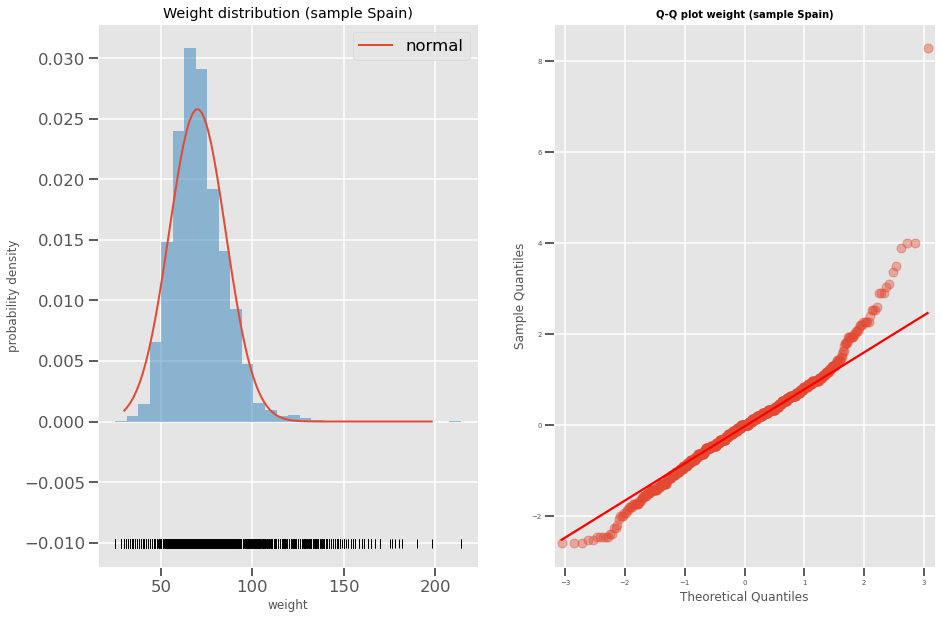

In [21]:
#sample spain

weight_spain = df_sample_spain[df_sample_spain["Weight"].notnull()]["Weight"]

# values of mean (mu) and standar desviation (sigma) of the sample(spain)
mu_spain, sigma_spain = stats.norm.fit(weight_spain)

#  Theoretical values of the normal in the observed range
x_hat = np.linspace(min(weight_spain), max(weight_spain), num=100)
y_hat = stats.norm.pdf(x_hat, mu_spain, sigma_spain)

# plots 
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[0].hist(x=weight, density=True, bins=30, color="#3182bd", alpha=0.5)
axes[0].plot(weight, np.full_like(weight, -0.01), '|k', markeredgewidth=1)
axes[0].set_title('Weight distribution (sample Spain)')
axes[0].set_xlabel('weight')
axes[0].set_ylabel('probability density')
axes[0].legend()

sm.qqplot(weight_spain,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axes[1]

)
axes[1].set_title('Q-Q plot weight (sample Spain)', fontsize = 10,
    fontweight = "bold")
axes[1].tick_params(labelsize = 7)


$~$

the plots show that there is no normal distribution in this sample.

$~$

As len(weight_spain) < 5000 we can use the shapiro test to confirm it



In [22]:
shapiro_test = stats.shapiro(weight_spain)
shapiro_test

alpha= 0.05

print('stat=%.3f, p=%.3f' % (stat, p))

if p < alpha:  # null hypothesis: weight_spain comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

stat=13334.426, p=0.000
The null hypothesis can be rejected


$~$

Since the assumption of normality is not satisfied, we will use a non-parametric test to see if the difference between the new sample and that of the population 
weight are statistically significant

$~$


In [23]:
df_sample_spain.Weight.describe()

count    894.000000
mean      69.978747
std       15.462507
min       30.000000
25%       61.000000
50%       70.000000
75%       78.000000
max      198.000000
Name: Weight, dtype: float64

$~$

As we can see that there is a bigger difference between the mean of the spanish athletes weight and the population mean (69.97 - 70.70). 

Now, we are going to verify if the difference that we observe is statistically significant. For this, we consider the following:

+ $H_0$ : $\mu_A$ $=$ $\mu_B$
+ $H_1$ : $\mu_A$ $\neq$ $\mu_B$
+ where:  $\mu_A$ $=$ weight_spain and  $\mu_B$ = population  weight 


$~$


In [24]:
# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(weight, weight_spain)
print(wilc)


RanksumsResult(statistic=0.6697401163895398, pvalue=0.5030234737295822)


In [25]:
# Test significance
alpha = 0.05
if (wilc[1] < alpha):
    print("mean value of Sample  differs from given value")
else:
    print("No significant difference found")


No significant difference found


$~$

Conclusion: We can reject null hypothesis with the significance level of 5% 

$~$


____
$~$

Let's try a different test. Suppose we want to see whether or not there is a bias on the ratio of male to female athletes significantly depart from 50-50. To test this we have to perform a [Chi-square test]()

$~$

In [26]:
sexratio = df["Sex"].value_counts()
sexratio

M    196594
F     74522
Name: Sex, dtype: int64

In [27]:
# Perform Chi-square test
chi= stats.chisquare(sexratio)
print(chi)

Power_divergenceResult(statistic=54963.82797031529, pvalue=0.0)


In [28]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between sexes is statistically significant")
else:
    print("No significant difference between sexes found")

Difference between sexes is statistically significant


**the Chi-square test shows that there are significantly more men than women**

$~$
___
####  Exercise 2

$~$

Continue with the sports theme dataset you like and select two other attributes from the dataset. Calculate the p-values and say if they reject the null hypothesis by taking a 5% alpha.

$~$
___

$~$

for this exercise, we are focusing on just one event, the women's 100 meter running race. let's look at how the heights of competitors have changed over time. A Pearson correlation test allows us to determine whether a linear relationship exists between two variables (*year* and *height*) 

$~$

+ First, let's make some plots, to see  how the runners' weights have changed over time.

$~$

In [29]:
#filter our dataset
women_100 = df[(df["Event"] == "Athletics Women's 100 metres") & df["Height"].notnull()]
women_100

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
526,299,Dana Abdul Razak (Hussain-),F,22.0,163.0,56.0,Iraq,IRQ,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
527,299,Dana Abdul Razak (Hussain-),F,26.0,163.0,56.0,Iraq,IRQ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN
1081,609,Fartun Abukar Omar,F,18.0,170.0,58.0,Somalia,SOM,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 100 metres,NaN
1096,613,Kariman Abuljadayel,F,22.0,180.0,70.0,Saudi Arabia,KSA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269182,134695,Lyudmila Ilyinichna Zharkova-Maslakova,F,20.0,175.0,59.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 100 metres,NaN
269184,134695,Lyudmila Ilyinichna Zharkova-Maslakova,F,24.0,175.0,59.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 100 metres,NaN
269320,134764,Marina Serafimovna Zhirova (Titova-),F,25.0,170.0,58.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres,NaN
270763,135410,Zaidatul Husniah Zulkifli,F,22.0,156.0,40.0,Malaysia,MAS,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN


In [30]:
#define our variables
w_height = women_100["Height"]
w_year =  women_100["Year"]

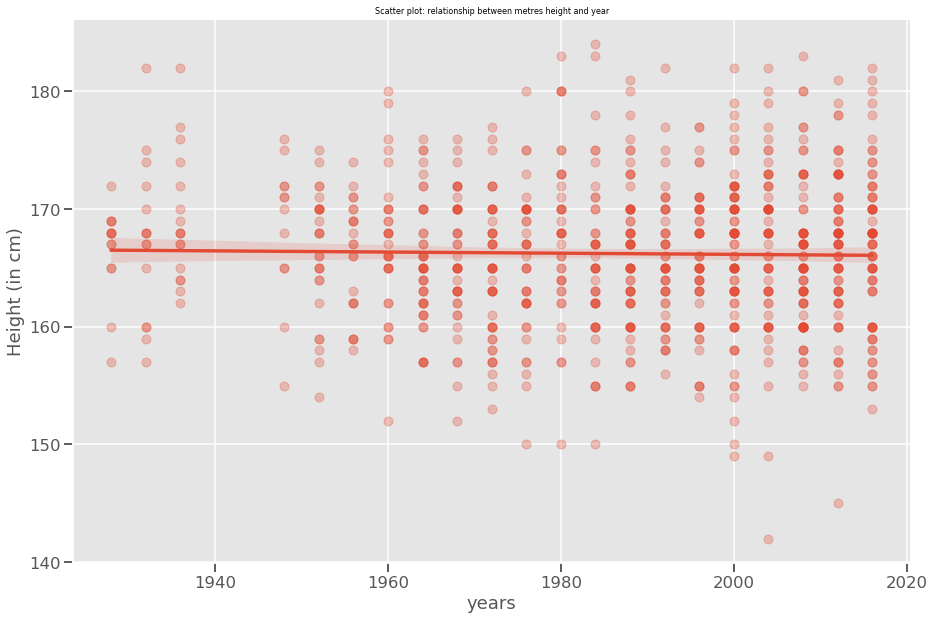

In [31]:
sns.set_context("talk")

#plot 
fig,axes = plt.subplots(1,1, figsize=(15,10))

#plot shows the regression line

sns.regplot(x=w_year, y=w_height,data=women_100,ax=axes,
            
            scatter_kws={'alpha':0.3})

axes.set_title("Scatter plot: relationship between \
metres height and year",fontsize=8)
axes.set_xlabel("years")
axes.set_ylabel("Height (in cm)")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)


$~$

**From what the plot shows, it seems that there is no relationship between the variables.**

$~$

Despite this, let's calculate Pearson's correlation coefficient and see whether or not there is correlation between the variables

$~$

In [32]:
pearson = stats.pearsonr(w_height,w_year)
print(pearson)

(-0.018466713687361733, 0.5738097081189003)


In [33]:
# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and year are significantly correlated")
else:
    print("No significant correlation found")

No significant correlation found


$~$

Let's repeat the exercise, but now let's see if there is a relationship between the weight and the height of the athletes:


$~$

In [34]:
#filter our dataset
women_100 = df[(df["Event"] == "Athletics Women's 100 metres") & df["Height"].notnull() & df["Weight"].notnull()]
women_100


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
526,299,Dana Abdul Razak (Hussain-),F,22.0,163.0,56.0,Iraq,IRQ,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
527,299,Dana Abdul Razak (Hussain-),F,26.0,163.0,56.0,Iraq,IRQ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN
1081,609,Fartun Abukar Omar,F,18.0,170.0,58.0,Somalia,SOM,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 100 metres,NaN
1096,613,Kariman Abuljadayel,F,22.0,180.0,70.0,Saudi Arabia,KSA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
1159,644,Claudia Acerenza Marez,F,22.0,160.0,55.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269182,134695,Lyudmila Ilyinichna Zharkova-Maslakova,F,20.0,175.0,59.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 100 metres,NaN
269184,134695,Lyudmila Ilyinichna Zharkova-Maslakova,F,24.0,175.0,59.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 100 metres,NaN
269320,134764,Marina Serafimovna Zhirova (Titova-),F,25.0,170.0,58.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres,NaN
270763,135410,Zaidatul Husniah Zulkifli,F,22.0,156.0,40.0,Malaysia,MAS,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN


In [35]:
#define our variables
w_height = women_100["Height"]
w_weight = women_100["Weight"]

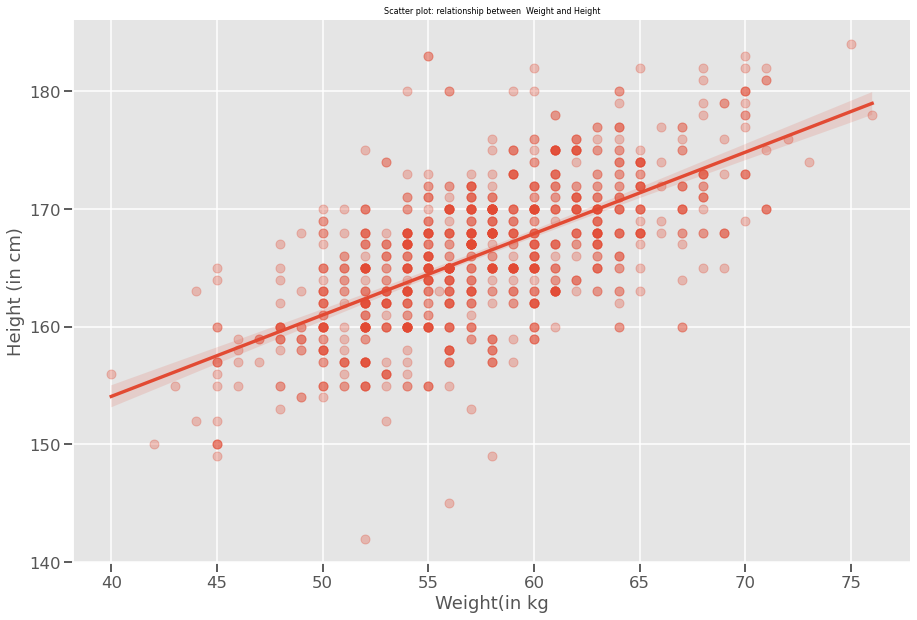

In [36]:
sns.set_context("talk")

#plot 
fig,axes = plt.subplots(1,1, figsize=(15,10))

#plot shows the regression line

sns.regplot(x=w_weight, y=w_height,data=women_100,ax=axes,
            
            scatter_kws={'alpha':0.3})

axes.set_title("Scatter plot: relationship between \
 Weight and Height",fontsize=8)
axes.set_xlabel("Weight(in kg")
axes.set_ylabel("Height (in cm)")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)


$~$

**From what the plot shows, it seems that there is positive relationship between weight and height.**

$~$

let's calculate Pearson's correlation coefficient and see whether or not there is correlation between the variables and if there are significantly correlated,

$~$

In [37]:
pearson = stats.pearsonr(w_weight,w_height)
print(pearson)

(0.644174799814726, 4.284134810199894e-109)


In [38]:
# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and height are significantly correlated")
else:
    print("No significant correlation found")

Weights and height are significantly correlated


$~$
___
####  Exercise 3

$~$

Continue with the sports theme dataset you like and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

$~$
___

$~$
For this exercise, we are going to check if the are presence of significant variantion in Weight of Olympic male athletes from teams of USA, France and China

$~$

+ First, let's do a some plots to see how our variables are distributed.
+ Then, let's performance a test to see whether any differences between these groups of values are significant.

$~$
the test will allow us to verify the following:

+ $H_0$ : $\mu_A$ $=$ $\mu_B$ = $\mu_C$ (There is no difference between weight of the groups ) 
+ $H_1$ : there is a difference between the means and groups 

Where   
+  $\mu_A$ is weight from athletes of USA
+  $\mu_B$ is weight from athletes of China
+  $\mu_C$ is weight from athletes of France


$~$



In [39]:
df_group= df[(df["NOC"] == "CHN") | (df["NOC"] == "FRA") | (df["NOC"]== "USA")]
df_group= df_group[df_group["Sex"]=="M"]
df_group= df_group[df_group["Event"].str.contains("Athletics")]
df_group= df_group[df_group["Weight"].notnull()]

In [40]:
display(df_group.head())
display(df_group.info())
display(df_group.shape)
display(df_group.NOC.unique())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
145,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,NaN
273,142,"David ""Dave"" Abbott",M,26.0,183.0,75.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Athletics,"Athletics Men's 5,000 metres",NaN
466,256,"Abdihakim ""Abdi"" Abdirahman",M,23.0,178.0,61.0,United States,USA,2000 Summer,2000,Summer,Sydney,Athletics,"Athletics Men's 10,000 metres",NaN
467,256,"Abdihakim ""Abdi"" Abdirahman",M,27.0,178.0,61.0,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Men's 10,000 metres",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122 entries, 98 to 271044
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3122 non-null   int64  
 1   Name    3122 non-null   object 
 2   Sex     3122 non-null   object 
 3   Age     3117 non-null   float64
 4   Height  3122 non-null   float64
 5   Weight  3122 non-null   float64
 6   Team    3122 non-null   object 
 7   NOC     3122 non-null   object 
 8   Games   3122 non-null   object 
 9   Year    3122 non-null   int64  
 10  Season  3122 non-null   object 
 11  City    3122 non-null   object 
 12  Sport   3122 non-null   object 
 13  Event   3122 non-null   object 
 14  Medal   867 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 390.2+ KB


None

(3122, 15)

array(['FRA', 'USA', 'CHN'], dtype=object)

$~$

Let's make some plots:

$~$


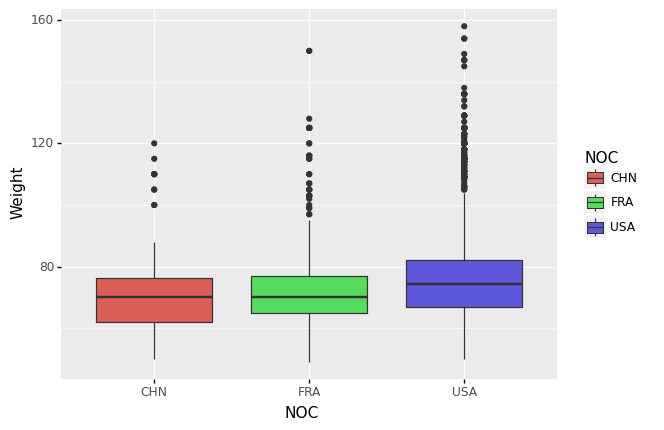

In [41]:
print(p9.ggplot(df_group)+ p9.aes(x='NOC',y='Weight', fill='NOC')+ p9.geom_boxplot())

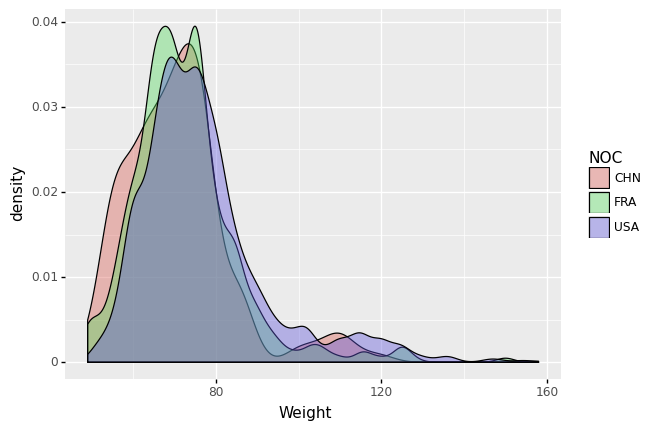

In [42]:
print(p9.ggplot(df_group)+ p9.aes(x='Weight', fill='NOC') + p9.geom_density(alpha=0.4))


$~$

In the plots above we see that possibly our variables do not have a normal distribution. Since the normality of the data distribution is an assumption we have to check let's do the verification
 


$~$

$~$

let's use the [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) test to determine if our variables have a normal distribution

$~$


In [43]:
# Create arrays
France_athletes = df_group[df_group.NOC == "FRA"].Weight
US_athletes = df_group[df_group.NOC == "USA"].Weight
China_athletes = df_group[df_group.NOC == "CHN"].Weight

In [44]:
print(len(France_athletes))
print(len(US_athletes))
print(len(China_athletes))

806
2140
176


In [45]:
# Shapiro-Wilk Normality Test

stat, p = stats.shapiro(France_athletes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Probably Gaussian')
else:
        print('Probably not Gaussian')

stat=0.890, p=0.000
Probably not Gaussian


In [46]:
# Shapiro-Wilk Normality Test

stat, p = stats.shapiro(US_athletes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Probably Gaussian')
else:
        print('Probably not Gaussian')

stat=0.879, p=0.000
Probably not Gaussian


In [47]:
# Shapiro-Wilk Normality Test


stat, p = stats.shapiro(China_athletes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Probably Gaussian')
else:
        print('Probably not Gaussian')

stat=0.899, p=0.000
Probably not Gaussian


$~$

**we have determined that our variables do not comply the assumption of normality**

$~$

$~$

how we already detectet data do not comply with the assumption of normality. For this reason, we will have to use non-parametric 
test.

 $~$

In [48]:
# Perform The Kruskal-Wallis -test 
kustal = stats.kruskal(France_athletes,US_athletes,China_athletes)
print(kustal)

KruskalResult(statistic=71.08813416155202, pvalue=3.659382462661707e-16)


$~$

Having calculate the test it will allow us to verify the following:

+ $H_0$ : The median is equal across all groups.
+ $H_1$ : The median is not equal across all groups.


$~$


In [49]:
# Test significance
alpha = 0.05
if (kustal[1] < alpha):
    print("we can reject the null hypothesis")
else:
    print("No significant difference found")


we can reject the null hypothesis


$~$

The p value obtained from Kruskal-Wallis -test  analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences significant differences exist between the weights of athletes for each country.

$~$

$~$
___
####  Conclusions

$~$
+ There are different methods to verify the normality of the data distribution.
+ The graphic approach (for the analysis of the normality of the data distribution) is useful but we cannot only rely on the plots, it is also necessary to use the statistical tests
+  Before performing a statistical test, it is important to know what assumptions this test requires.




___
$~$

___
$~$

####  *References*:

+ [Scipy Stats ttest_1samp Hypothesis Testing ](https://stackoverflow.com/questions/35788140/scipy-stats-ttest-1samp-hypothesis-testing-for-comparing-previous-performance-to) 
+ [Chi-Square Test, with Python](https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626) 
+ [Experimental Design in Python](https://www.datacamp.com/courses/experimental-design-in-python) 
+ [Análisis de normalidad con python](https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html) 
+ [Methods for Normality Test with Application in Python](https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5)
+ [How to Perform a Kruskal-Wallis Test in Python](https://www.statology.org/kruskal-wallis-test-python/)

$~$
___